## Example Runge Kutta
This notebook illustrates the 4th order Runge Kutta method using the initial value problem
$$ y′=t−y,  (0 \leq t \leq 4) $$
with the initial condition
$$ y(0)=1 $$.
 
### Setting up Libraries

In [1]:
import numpy as np
import math 

%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import warnings

warnings.filterwarnings("ignore")
class ListTable(list):
    """ Overridden list class which takes a 2-dimensional list of 
        the form [[1,2,3],[4,5,6]], and renders an HTML Table in 
        IPython Notebook. """
    
    def _repr_html_(self):
        html = ["<table>"]
        for row in self:
            html.append("<tr>")
            
            for col in row:
                html.append("<td>{0}</td>".format(col))
            
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)

### Defining the function
$$ f(t,y)=t−y $$
 


In [2]:
def myfun_ty(t,y):
    return t-y

### Discrete Interval
Defining the step size $h$ from the interval range $a \leq t \leq b$ and number of steps N
$$ h = \frac{b-a}{N} $$
This gives the discrete time steps,
$$ t_{i} = t_{0} + ih $$,
where  $t_{0}=a$
Here the interval is $0 \leq t \leq 4$ and number of steps 8
$$ h = \frac{4 - 0}{8} = 0.5 $$
This gives the discrete time steps,
$$ t_{i} = 0 + i0.5,$$

for $i=0,1,⋯,8.$
 

 

 

Text(0.5, 1.0, 'Illustration of discrete time points for h=0.5')

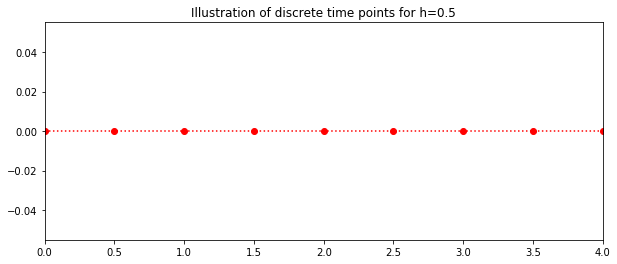

In [3]:
# Start and end of interval
b=4
a=0
# Step size
N=8
h=(b-a)/(N)
t=np.arange(a,b+h,h)
fig = plt.figure(figsize=(10,4))
plt.plot(t,0*t,'o:',color='red')
plt.xlim((0,4))
plt.title('Illustration of discrete time points for h=%s'%(h))

## Exact Solution
The intial value problem has the exact solution
$$ y = 2e^{-t} +t -1 $$
The figure below plots the exact solution.

Text(0.5, 0, 'time')

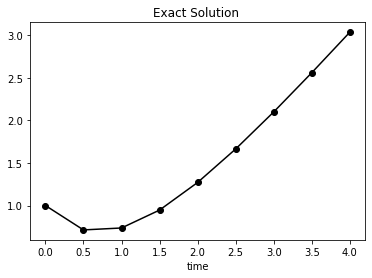

In [4]:
IC=1 # Intial condtion
y=(IC+1)*np.exp(-t)+t-1
fig = plt.figure(figsize=(6,4))
plt.plot(t,y,'o-',color='black')
plt.title('Exact Solution ')
plt.xlabel('time')

### Setting up the initial conditions of the equation
$$w_0=1$$

In [5]:
# Initial Condition
w=np.zeros(N+1)
#np.zeros(N+1)
w[0]=IC

## 4th Order Runge Kutta
The general form of the 4th order Runge Kutta is:
$$ k_{1}=f(t,w),$$
$$ k_{2}=f(t+\frac{h}{2},w+\frac{h}{2}k_{1}),$$
$$ k_{3}=f(t+\frac{h}{2},w+\frac{h}{2}k_{2}),$$
$$ k_{4}=f(t+h,w+hk_{3}),$$
$$ w_{i+1}=w_{i} +\frac{h}{6}(k_{1}+2k_{2}+2k_{3}+k_{4}).$$

For this differential equation the specific 4th order Runge Kutta methods is:

$$ k_{1}= t - w_{i},$$
$$ k_{2}= (t+\frac{h}{2}) - ( w_{i}+\frac{h}{2}k_{1}),$$
$$ k_{2}= (t+\frac{h}{2}) - ( w_{i}+\frac{h}{2}k_{2}),$$
$$ k_{4}= (t + h) - (w_{i} + hk_{3}),$$
$$ w_{i+1}=w_{i} +\frac{h}{6}(k_{1}+2k_{2}+2k_{3}+k_{4}).$$


 


 
 


 


In [6]:
for k in range (0,N):
    k1=myfun_ty(t[k],w[k])
    k2=myfun_ty(t[k]+h/2,w[k]+h/2*k1)
    k3=myfun_ty(t[k]+h/2,w[k]+h/2*k2)
    k4=myfun_ty(t[k]+h,w[k]+h*k3)
    w[k+1]=w[k]+h/6*(k1+2*k2+2*k3+k4)

## Plotting Results
The plot below shows the exact solution (black) and the 4th order Runge Kutta Approximation.

<function matplotlib.pyplot.show(*args, **kw)>

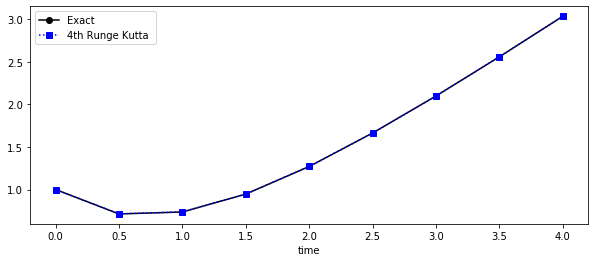

In [7]:
fig = plt.figure(figsize=(10,4))
# --- left hand plot
plt.plot(t,y, 'o-',color='black',label='Exact')
plt.plot(t,w,'s:',color='blue',label='4th Runge Kutta ')
plt.xlabel('time')
plt.legend()
plt.show

In [8]:
table = ListTable()
table.append(['time', 'RK','Exact','Error','LTE'])
for i in range (0,N+1):
    table.append([round(t[i],3), round(w[i],3), round(y[i],3),round(abs(y[i]-w[i]),5),round(2*0.5**5,5)])
    
table

time,RK,Exact,Error,LTE
0.0,1.0,1.0,0.0,0.0625
0.5,0.714,0.713,0.00048,0.0625
1.0,0.736,0.736,0.00058,0.0625
1.5,0.947,0.946,0.00053,0.0625
2.0,1.271,1.271,0.00043,0.0625
2.5,1.664,1.664,0.00033,0.0625
3.0,2.1,2.1,0.00024,0.0625
3.5,2.561,2.56,0.00017,0.0625
4.0,3.037,3.037,0.00012,0.0625
